<a href="https://colab.research.google.com/github/Mental812/2nd-DL-CVMarathon/blob/master/HW6_%E4%BB%BF%E5%B0%84%E8%AE%8A%E6%8F%9B%E7%9A%84%E6%A6%82%E5%BF%B5%E8%88%87%E5%AF%A6%E4%BD%9C_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/CV_ML-colab/lena.png')

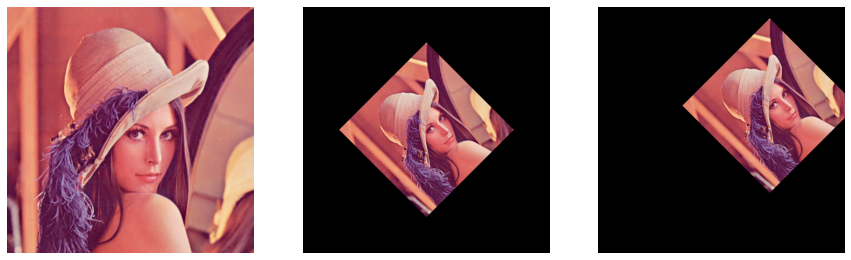

In [3]:
# 取得旋轉矩陣
# getRotationMatrix2D(center, angle, scale)
M_rotate = cv2.getRotationMatrix2D(([i//2 for i in img.shape[-2::-1]]), 45, 0.5)

# 取得平移矩陣
M_translate = np.float32([[1, 0, 100], [0, 1, -50]])

# 旋轉
img_rotate = cv2.warpAffine(img, M_rotate, (img.shape[-2::-1]))

# 平移
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (img.shape[-2::-1]))

# 組合 + 顯示圖片
plt.figure(figsize=(15,5))
for i, x in enumerate([img,img_rotate,img_rotate_trans]):
    plt.subplot(1, 3, i+1).imshow(x[...,[2, 1, 0]])
    plt.axis('off')
plt.show()

## Affine Transformation - Case 2: any three point

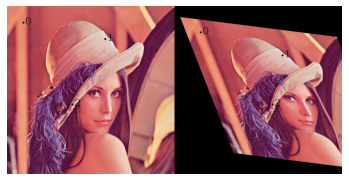

In [6]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
M_affine = cv2.getAffineTransform(pt1, pt2)
img_affine = cv2.warpAffine(img, M_affine, (img.shape[-2::-1]))


# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 0, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 1)

for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 3, (0, 0, 0), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 1)

# 組合 + 顯示圖片
img_show_affine = np.hstack((img_copy, img_affine))
im_plt = cv2.cvtColor(img_show_affine, cv2.COLOR_BGR2RGB)
plt.imshow(im_plt)
plt.axis('off')
plt.show()